<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


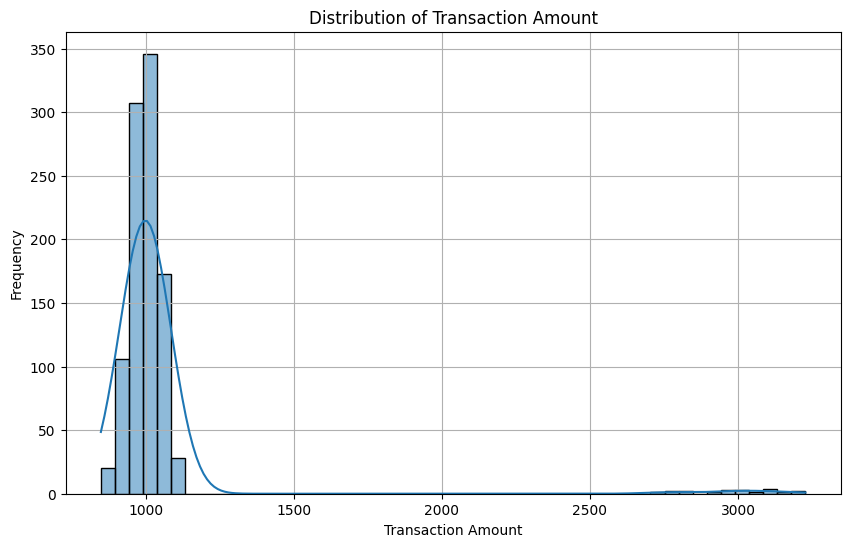

(Transaction_ID                 0
 Transaction_Amount             0
 Transaction_Volume             0
 Average_Transaction_Amount     0
 Frequency_of_Transactions      0
 Time_Since_Last_Transaction    0
 Day_of_Week                    0
 Time_of_Day                    0
 Age                            0
 Gender                         0
 Income                         0
 Account_Type                   0
 dtype: int64,
 None,
        Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
 count         1000.000000         1000.000000                 1000.000000   
 mean          1038.122511            2.498000                 1000.682506   
 std            283.580055            1.115006                   20.632334   
 min            849.024392            1.000000                  939.081423   
 25%            966.028796            1.000000                  986.800556   
 50%           1002.118678            3.000000                 1000.501902   
 75%           1033.1436

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/transaction_anomalies_dataset.csv'
df = pd.read_csv(file_path)

# Q.1: Data exploration
# Check for null values
null_values = df.isnull().sum()

# Check column info
column_info = df.info()

# Descriptive statistics of the data
descriptive_stats = df.describe()

# Q.2: Distribution of Transaction Amount
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(null_values, column_info, descriptive_stats)

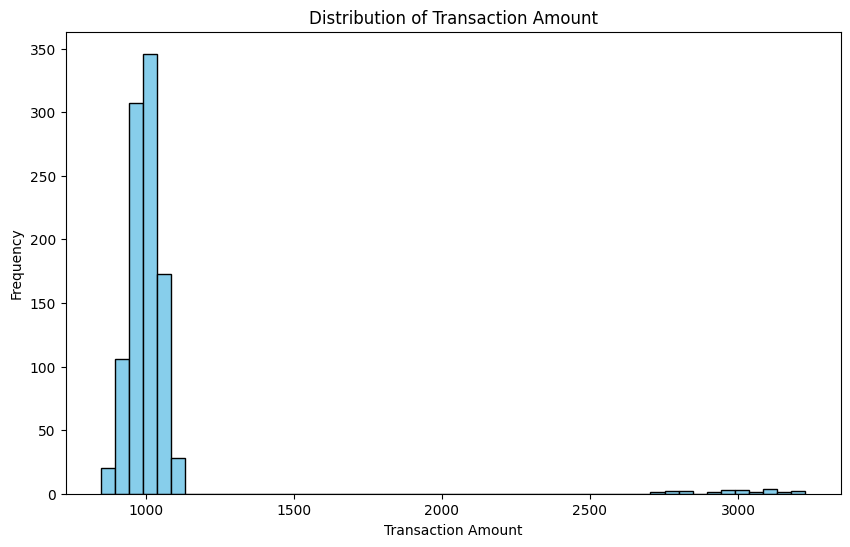

In [ ]:
import matplotlib.pyplot as plt

# Check distribution of transactions amount in the data
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

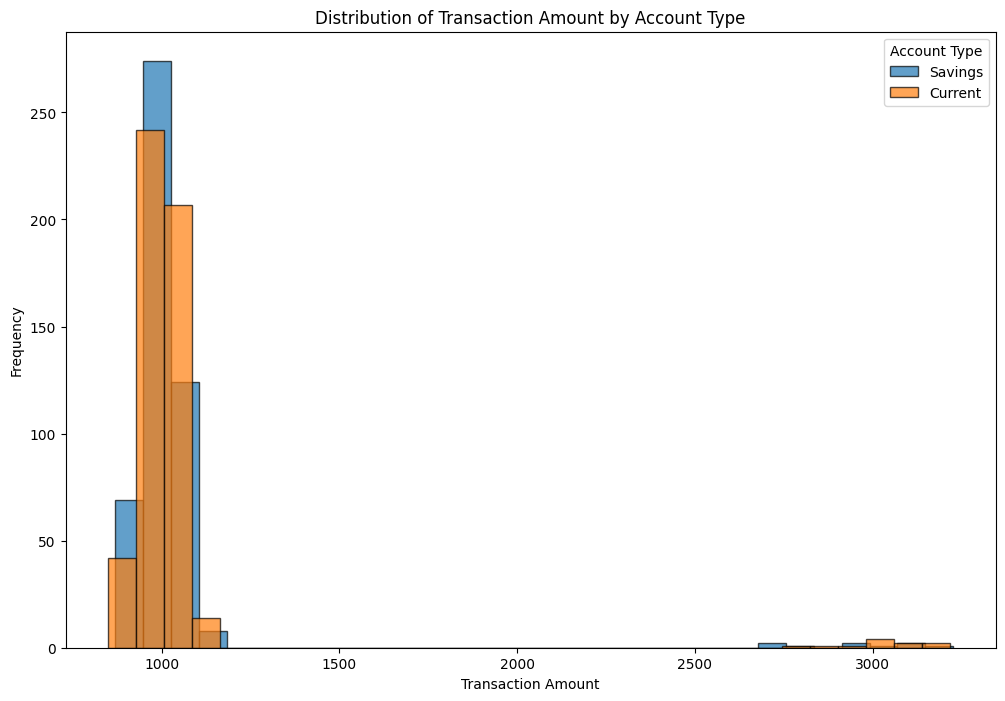

In [ ]:
# Check distribution of transactions amount by account type
plt.figure(figsize=(12, 8))
for account_type in df['Account_Type'].unique():
    subset = df[df['Account_Type'] == account_type]
    plt.hist(subset['Transaction_Amount'], bins=30, alpha=0.7, label=account_type, edgecolor='black')

plt.title('Distribution of Transaction Amount by Account Type')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Account Type')
plt.show()

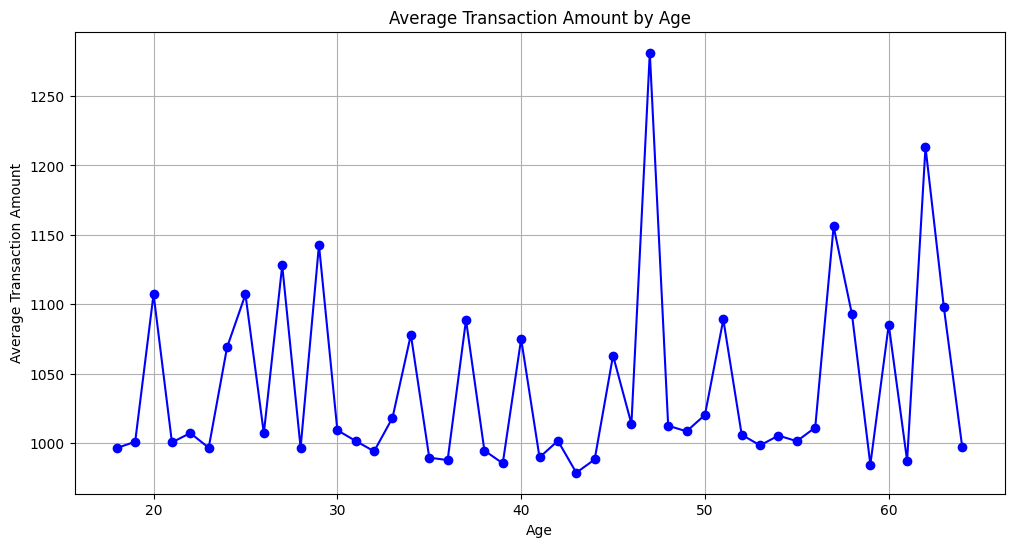

,Age,Transaction_Amount
0,18,996.381633
1,19,1000.935435
2,20,1107.299523
3,21,1000.436424
4,22,1007.187911
5,23,996.574490
6,24,1068.980273
7,25,1107.066897
8,26,1006.965183
9,27,1127.922688


In [ ]:
# Check the average transaction amount by age
average_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_transaction_by_age['Age'], average_transaction_by_age['Transaction_Amount'], marker='o', linestyle='-', color='blue')
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.show()

average_transaction_by_age

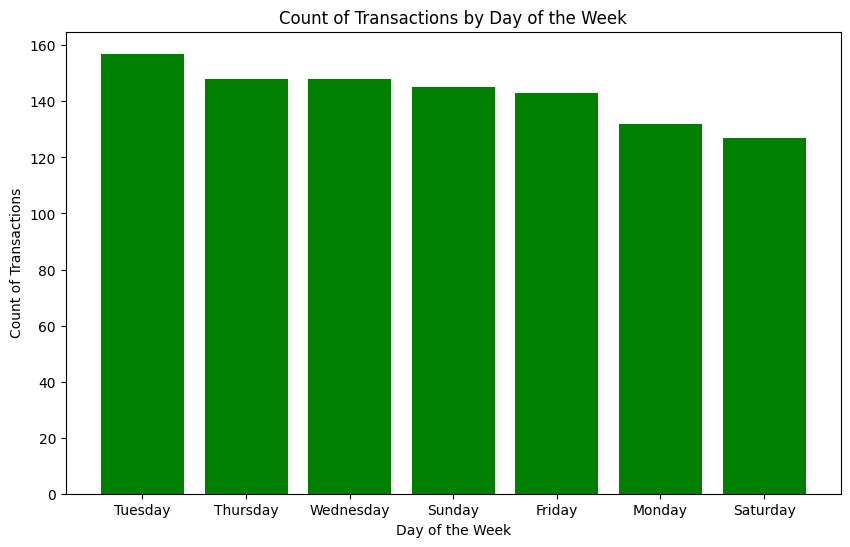

,Day_of_Week,Count
0,Tuesday,157
1,Thursday,148
2,Wednesday,148
3,Sunday,145
4,Friday,143
5,Monday,132
6,Saturday,127


In [ ]:
# Check the count of transactions by day of the week
transactions_by_day = df['Day_of_Week'].value_counts().reset_index()
transactions_by_day.columns = ['Day_of_Week', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(transactions_by_day['Day_of_Week'], transactions_by_day['Count'], color='green')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.show()

transactions_by_day

<ipython-input-7-933ef66ab8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


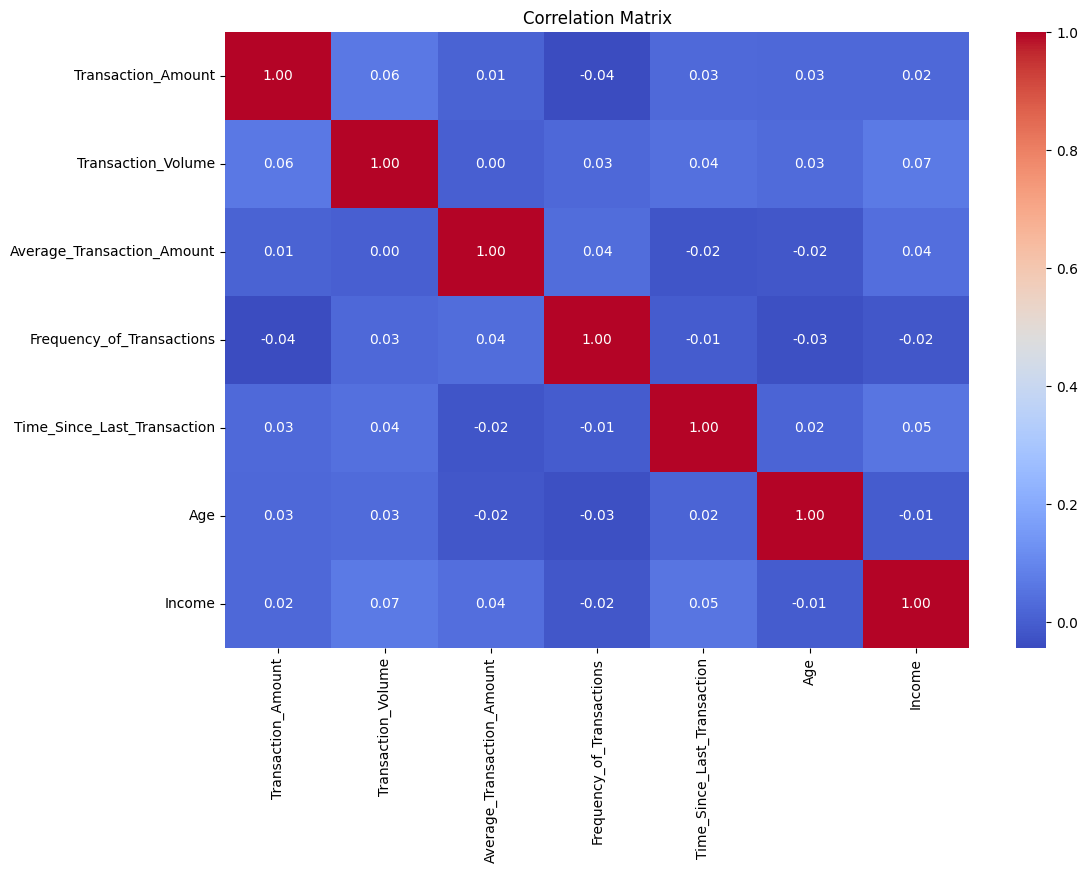

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
Transaction_Amount,1.000000,0.062350,0.010198,-0.043975,0.026767,0.025019,0.023536
Transaction_Volume,0.062350,1.000000,0.003613,0.025198,0.044042,0.029608,0.066288
Average_Transaction_Amount,0.010198,0.003613,1.000000,0.036980,-0.023472,-0.017699,0.037654
Frequency_of_Transactions,-0.043975,0.025198,0.036980,1.000000,-0.005798,-0.033817,-0.018207
Time_Since_Last_Transaction,0.026767,0.044042,-0.023472,-0.005798,1.000000,0.016974,0.054270
Age,0.025019,0.029608,-0.017699,-0.033817,0.016974,1.000000,-0.006031
Income,0.023536,0.066288,0.037654,-0.018207,0.054270,-0.006031,1.000000


In [ ]:
# Check the correlation between all the columns in the data
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

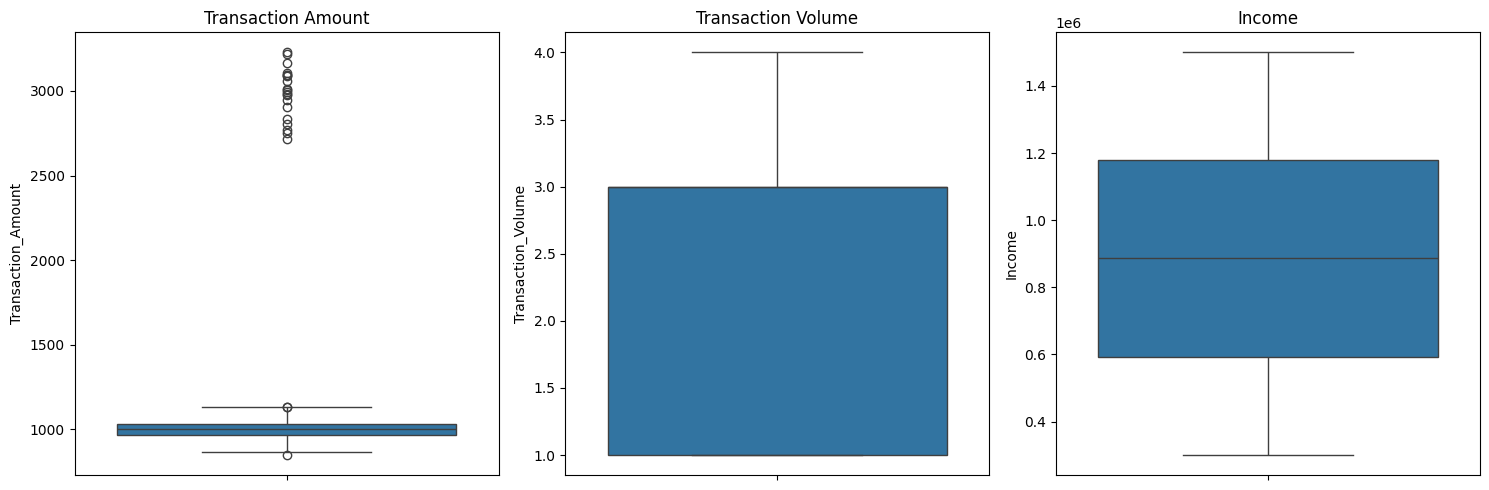

In [ ]:
# Box plots for anomaly detection
plt.figure(figsize=(15, 5))

# Box plot for Transaction_Amount
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Transaction_Amount')
plt.title('Transaction Amount')

# Box plot for Transaction_Volume
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Transaction_Volume')
plt.title('Transaction Volume')

# Box plot for Income
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Income')
plt.title('Income')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate IQR for Transaction_Amount
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of anomalies
anomalies = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
num_anomalies = anomalies.shape[0]

# Calculate the ratio of anomalies
total_transactions = df.shape[0]
anomaly_ratio = num_anomalies / total_transactions

num_anomalies, anomaly_ratio

(23, 0.023)

In [ ]:
import pandas as pd

# load the dataset
file_path = '/content/transaction_anomalies_dataset.csv'
data = pd.read_csv(file_path)

#display the first few rows of the dataset to understand its structure
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [ ]:
from sklearn.ensemble import IsolationForest

# Selecting relevant features for anomaly detection
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction']

# Preparing the data
X = data[features]

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model
model.fit(X)

# Predict anomalies
predictions = model.predict(X)

# Convert predictions to binary values: -1 (anomalies) becomes 1, 1 (normal) becomes 0
binary_predictions = (predictions == -1).astype(int)

binary_predictions[:10]  # Display the first 10 predictions to check the output


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

# Define the lower and upper bounds
lower_bound = 100
upper_bound = 1000


# Create true labels based on the IQR method
true_labels = ((df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)).astype(int)

# Generate classification report
report = classification_report(true_labels, binary_predictions, target_names=['Normal', 'Anomaly'])
print(report)


              precision    recall  f1-score   support

      Normal       0.51      0.74      0.60       487
     Anomaly       0.56      0.32      0.41       513

    accuracy                           0.52      1000
   macro avg       0.53      0.53      0.50      1000
weighted avg       0.54      0.52      0.50      1000



In [ ]:
# Sample new data with the same features as the original dataset
new_data = pd.DataFrame({
    'Transaction_Amount': [950, 1200, 3000, 1050],
    'Transaction_Volume': [2, 3, 4, 1],
    'Average_Transaction_Amount': [1000, 1500, 2000, 1200],
    'Frequency_of_Transactions': [10, 15, 20, 12],
    'Time_Since_Last_Transaction': [1, 2, 3, 1]
})

# Use the trained model to predict anomalies in the new data
new_predictions = model.predict(new_data)

# Convert predictions to binary values (1 for anomalies, 0 for normal)
new_binary_predictions = (new_predictions == -1).astype(int)

# Display the results
new_data['Anomaly'] = new_binary_predictions
new_data

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Anomaly
0,950,2,1000,10,1,0
1,1200,3,1500,15,2,1
2,3000,4,2000,20,3,1
3,1050,1,1200,12,1,1
